# Model will be trained with CategoricalLike CategorizedOnly Data

CategoricalLike CategorizedOnly dataset contains labeled rows [0, 1, 2] - ['Hated', 'Not Liked', 'Liked'] pairs

CategoricalLike CategorizedOnly dataset provides a valid criterion for like

Because it contains not only the information whether the movie is liked or not, but also how much it is liked

So it is one of the most useful datasets for the recommendation system

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

In [2]:
#Printing library versions
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)

numpy Version: 1.16.5
pandas Version: 0.25.1
tensorflow Version: 2.0.0


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Reading Qualified CategoricalLike CategorizedOnly training data from pkl file
trainingDf = pd.read_pickle("../Data/pkl/1M/Qualified/CategoricalLike/CategorizedOnly/Training.pkl")
trainingDf

,UserId,MovieId,Category
0,9999,690,1
1,4532,1007,2
2,3969,726,2
3,1271,9157,1
4,7932,1201,1
...,...,...,...
753628,9556,1403,1
753629,4795,17453,1
753630,2116,434,1
753631,1910,4512,1


In [5]:
#creating a user array for training input 
trainingUser = trainingDf[['UserId']].values.astype(np.int32)
trainingUser = trainingUser.reshape((trainingUser.shape[0]))
trainingUser

array([9999, 4532, 3969, ..., 2116, 1910, 6015])

In [6]:
#creating a movie array for training input 
trainingMovie = trainingDf[['MovieId']].values.astype(np.int32)
trainingMovie = trainingMovie.reshape((trainingMovie.shape[0]))
trainingMovie

array([ 690, 1007,  726, ...,  434, 4512,  110])

In [7]:
#creating an array for training input 
trainingX = [trainingUser, trainingMovie]
trainingX

[array([9999, 4532, 3969, ..., 2116, 1910, 6015]),
 array([ 690, 1007,  726, ...,  434, 4512,  110])]

In [8]:
#Output is converted to One-Hot Encoding and creating an array for training output 
trainingY = []
for i in trainingDf[['Category']].values:
    current = np.zeros(3)
    current[i] = 1
    trainingY.append(current)
trainingY = np.array(trainingY).astype(np.int8)
trainingY

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

In [9]:
#Clearing Memory
del trainingDf

In [10]:
#Reading Qualified CategoricalLike CategorizedOnly validation data from pkl file
validationDf = pd.read_pickle("../Data/pkl/1M/Qualified/CategoricalLike/CategorizedOnly/Validation.pkl")
validationDf

,UserId,MovieId,Category
0,238,315,1
1,2311,933,1
2,9877,866,2
3,234,424,2
4,8066,1669,2
...,...,...,...
123625,2038,280,1
123626,8717,154,2
123627,7348,1068,1
123628,1932,12061,1


In [11]:
#creating a user array for validation input 
validationUser = validationDf[['UserId']].values.astype(np.int32)
validationUser = validationUser.reshape((validationUser.shape[0]))
validationUser

array([ 238, 2311, 9877, ..., 7348, 1932, 7604])

In [12]:
#creating a movie array for validation input 
validationMovie = validationDf[['MovieId']].values.astype(np.int32)
validationMovie = validationMovie.reshape((validationMovie.shape[0]))
validationMovie

array([  315,   933,   866, ...,  1068, 12061,   303])

In [13]:
#creating an array for validation input 
validationX = [validationUser, validationMovie]
validationX

[array([ 238, 2311, 9877, ..., 7348, 1932, 7604]),
 array([  315,   933,   866, ...,  1068, 12061,   303])]

In [14]:
#Output is converted to One-Hot Encoding and creating an array for validation output 
validationY = []
for i in validationDf[['Category']].values:
    current = np.zeros(3)
    current[i] = 1
    validationY.append(current)
validationY = np.array(validationY).astype(np.int8)
validationY

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int8)

In [15]:
#Clearing Memory
del validationDf

In [16]:
#Setting model variables
userSize = 10073
movieSize = 22033
latentDimensionMF = 4
latentDimensionMLP = 32
regMF = 0
regMLP = 0.01
regDense = 0.01
denseActivation = 'relu'

In [17]:
#Creating Neural Collaborative Filtering(NCF) model

#This Neural matrix factorization model based on https://arxiv.org/pdf/1708.05031.pdf
#As a result of the researches, it was determined as the most useful architecture
#This architecture will be trained with different data types and explanations will be made on the results. 


# input layer
userInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "userId")
movieInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "movieId")

# embedding layers
userEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMF,
    name = 'userEmbeddingMF',
    embeddings_initializer = 'he_normal',
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)
movieEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMF,
    name = "movieEmbeddingMF",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)

userEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMLP,
    name = "userEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)
movieEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMLP,
    name="movieEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)

# MF vector
userLatentMF = tf.keras.layers.Flatten()(userEmbeddingMF(userInput))
movieLatentMF = tf.keras.layers.Flatten()(movieEmbeddingMF(movieInput))
catLatentMF = tf.keras.layers.Multiply()([userLatentMF, movieLatentMF])

# MLP vector
userLatentMLP = tf.keras.layers.Flatten()(userEmbeddingMLP(userInput))
movieLatentMLP = tf.keras.layers.Flatten()(movieEmbeddingMLP(movieInput))
catLatentMLP = tf.keras.layers.Concatenate()([userLatentMLP, movieLatentMLP])

vectorMLP = catLatentMLP

layer = tf.keras.layers.Dense(
    32,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense1'
)

vectorMLP = layer(vectorMLP)

layer = tf.keras.layers.Dense(
    16,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense2'
)

vectorMLP = layer(vectorMLP)

predictLayer = tf.keras.layers.Concatenate()([catLatentMF, vectorMLP])

#Since dataset has 3 labels result layer turns into 3 softmax perceptron
result = tf.keras.layers.Dense(3, activation="softmax", name="Like")

output = result(predictLayer)

model = tf.keras.models.Model(inputs = [userInput, movieInput], outputs = [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
userId (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
movieId (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
userEmbeddingMLP (Embedding)    (None, 32)           322336      userId[0][0]                     
__________________________________________________________________________________________________
movieEmbeddingMLP (Embedding)   (None, 32)           705056      movieId[0][0]                    
______________________________________________________________________________________________

In [18]:
#Compile model
#Since the dataset has 3 label [0, 1, 2] - ['Hated', 'Not Liked', 'Liked'] 
#Categorical crossentropy function will be used as loss function
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy")
    ])

In [19]:
#Defining CallBack class for save model
class ModelSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #calculation based on epoch + 1 Due to first epoch starts at 0
        if (epoch + 1) % 3 == 0:
            self.model.save("../Model/CategorizedOnlyModel/Model{}.h5".format(epoch + 1))

In [20]:
#ignore warnings due to Converting sparse IndexedSlices to a dense Tensor of unknown shape warning
warnings.filterwarnings('ignore')

#Fit the model
#This dataset categorized as Hated, Not Liked and Liked movies
#Our dataset contains only interacted pairs
#Since CategoricalLike CategorizedOnly dataset provides a real good valid criterion for like 
#It is one of the most useful dataset for the recommendation system
#So I will focus improve performance of this model
with tf.device('/GPU:0'):
    trainingHistory = model.fit(
        x = trainingX,
        y = trainingY,
        batch_size = 64,
        shuffle = True,
        callbacks=[ModelSaver()],
        epochs = 24,
        verbose = 1,
        validation_data = (validationX, validationY),
    )

Train on 753633 samples, validate on 123630 samples
Epoch 1/24
753633/753633 [==============================] - 165s 219us/sample - loss: 0.8945 - accuracy: 0.7489 - val_loss: 0.8284 - val_accuracy: 0.7693
Epoch 2/24
753633/753633 [==============================] - 222s 295us/sample - loss: 0.7857 - accuracy: 0.7839 - val_loss: 0.7844 - val_accuracy: 0.7760
Epoch 3/24
753633/753633 [==============================] - 223s 296us/sample - loss: 0.7379 - accuracy: 0.7940 - val_loss: 0.7692 - val_accuracy: 0.7772
Epoch 4/24
753633/753633 [==============================] - 220s 291us/sample - loss: 0.7171 - accuracy: 0.7987 - val_loss: 0.7645 - val_accuracy: 0.7782
Epoch 5/24
753633/753633 [==============================] - 220s 292us/sample - loss: 0.7032 - accuracy: 0.8019 - val_loss: 0.7562 - val_accuracy: 0.7777
Epoch 6/24
753633/753633 [==============================] - 223s 296us/sample - loss: 0.6920 - accuracy: 0.8042 - val_loss: 0.7554 - val_accuracy: 0.7781
Epoch 7/24
753633/753633

In [21]:
#Checking Training history data
trainingHistory.history

{'loss': [0.8945498350810287,
  0.7856982745139354,
  0.7379271417138358,
  0.7171355055130884,
  0.7031886094912764,
  0.6919913215516219,
  0.6854876380739962,
  0.6821419369682106,
  0.6745973346645372,
  0.671509567116368,
  0.6678102224679234,
  0.6648911040021566,
  0.6620265852447491,
  0.6602871324017314,
  0.658132487646226,
  0.6570445786285259,
  0.6536785488460314,
  0.6518691670147968,
  0.6529885447824596,
  0.6487544995286365,
  0.6481045671337016,
  0.6449911987043,
  0.6444272468641765,
  0.6434558821228638],
 'accuracy': [0.7488769,
  0.7839479,
  0.7939621,
  0.7987022,
  0.8018869,
  0.8041558,
  0.8054313,
  0.8070767,
  0.8079491,
  0.80887175,
  0.8096294,
  0.8102229,
  0.8109482,
  0.81163245,
  0.81181705,
  0.8121902,
  0.8126147,
  0.8128707,
  0.81313735,
  0.81363964,
  0.8139338,
  0.81428444,
  0.8144867,
  0.81477696],
 'val_loss': [0.8284148158846207,
  0.784430738433823,
  0.7691702830119397,
  0.7644924097410984,
  0.7562158031784909,
  0.75539057940

In [22]:
#Import pyplot for graphics
from matplotlib import pyplot as plt

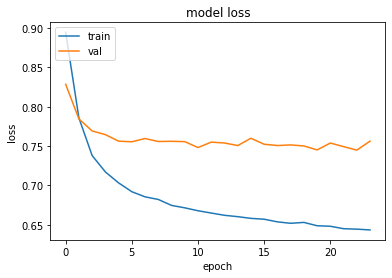

In [23]:
#Loss Graph
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

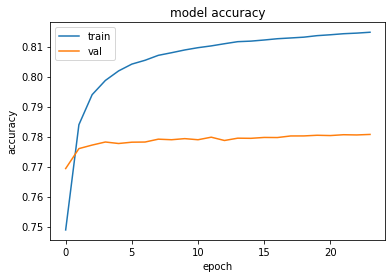

In [24]:
#Accuracy Graph
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

In [25]:
#Reading Qualified CategoricalLike CategorizedOnly test data from pkl file
testDf = pd.read_pickle("../Data/pkl/1M/Qualified/CategoricalLike/CategorizedOnly/Test.pkl")
testDf

,UserId,MovieId,Category
0,1470,861,2
1,2736,789,2
2,8041,1101,2
3,3317,336,1
4,5490,2359,1
...,...,...,...
123625,3246,983,1
123626,8886,2413,2
123627,1487,776,0
123628,7680,97,1


In [26]:
#creating a user array for test input 
testUser = testDf[['UserId']].values.astype(np.int32)
testUser = testUser.reshape((testUser.shape[0]))
testUser

array([1470, 2736, 8041, ..., 1487, 7680, 9080])

In [27]:
#creating a movie array for test input 
testMovie = testDf[['MovieId']].values.astype(np.int32)
testMovie = testMovie.reshape((testMovie.shape[0]))
testMovie

array([ 861,  789, 1101, ...,  776,   97, 4385])

In [28]:
#creating an array for test input 
testX = [testUser, testMovie]
testX

[array([1470, 2736, 8041, ..., 1487, 7680, 9080]),
 array([ 861,  789, 1101, ...,  776,   97, 4385])]

In [29]:
#Output is converted to One-Hot encoding and creating an array for test output 
testY = []
for i in testDf[['Category']].values:
    current = np.zeros(3)
    current[i] = 1
    testY.append(current)
testY = np.array(testY).astype(np.int8)
testY

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

In [30]:
#Clearing Memory
del testDf

In [31]:
#Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [32]:
#Print testResult
testResult

[0.7551415860262405, 0.7828817]

In [33]:
#Print Test Loss
print('Test Loss: ' + str(testResult[0]))

Test Loss: 0.7551415860262405


In [34]:
#Print Test Accuracy
print('Test Accuracy: ' + str(testResult[1]))

Test Accuracy: 0.7828817


In [35]:
#When the metric graphs are examined, it is seen that the best model is reached between the 15th and 20th epochs.
#After the 18th epoch, the amount of performance does not seem to change much.
#So the model in the 18th epoch is determined as the best model.

#Model18 Loading from h5 file
model = tf.keras.models.load_model("../Model/CategorizedOnlyModel/Model18.h5")

In [36]:
#Best Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [37]:
#Print testResult for Best Model
testResult

[0.7505836447224613, 0.78219926]

In [38]:
#Print Test Loss for Best Model
print('Test Loss: ' + str(testResult[0]))

Test Loss: 0.7505836447224613


In [39]:
#Print Test Accuracy for Best Model
print('Test Accuracy: ' + str(testResult[1]))

Test Accuracy: 0.78219926


# Analysing Result

As can be seen above, the performance of the model obtained at the end of the training and the 18th model that chosen as the best model on the test data is almost equal

In this case, it is pointless to train the model further after the 18th epoch

Result look good

Dataset is usefull for recommendation system